# 뚝섬

In [845]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [846]:
import pandas as pd

# 뚝섬 일별데이터 불러오기

In [847]:
df = pd.read_csv("../Data/뚝섬일별데이터.csv")
df.head()

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
0,PLT-005,뚝섬1주차장,273,22891.0,2024-11-10,2024,11,10,주말,83.849817
1,PLT-005,뚝섬3주차장,686,62848.0,2024-11-10,2024,11,10,주말,91.615160
2,PLT-005,뚝섬4주차장,864,79419.0,2024-11-10,2024,11,10,주말,91.920139
3,PLT-005,뚝섬2주차장,965,108345.0,2024-11-10,2024,11,10,주말,112.274611
4,PLT-005,뚝섬2주차장,850,91910.0,2024-11-09,2024,11,9,주말,108.129412


In [848]:
df.tail()

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간
6951,PLT-005,뚝섬2주차장,127,30987.0,2020-01-21,2020,1,21,평일,243.992126
6952,PLT-005,뚝섬3주차장,58,1468.0,2020-01-20,2020,1,20,평일,25.310345
6953,PLT-005,뚝섬3주차장,242,14229.0,2020-01-19,2020,1,19,주말,58.797521
6954,PLT-005,뚝섬3주차장,253,18191.0,2020-01-18,2020,1,18,주말,71.901186
6955,PLT-005,뚝섬3주차장,159,19681.0,2020-01-17,2020,1,17,평일,123.779874


In [849]:
df.shape

(6956, 10)

In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지구별          6956 non-null   object 
 1   주차장명         6956 non-null   object 
 2   주차대수         6956 non-null   int64  
 3   이용시간         6956 non-null   float64
 4   날짜           6956 non-null   object 
 5   년도           6956 non-null   int64  
 6   월            6956 non-null   int64  
 7   일            6956 non-null   int64  
 8   휴일여부         6956 non-null   object 
 9   1대당 평균 주차시간  6956 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 543.6+ KB


## 지난 날씨 데이터 가져오기

In [851]:
df_w = pd.read_csv("../Data/서울 날씨(180131~240229).csv", encoding='euc-kr')
df_w.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 상대습도(%)
0,108,서울,2018-01-31,-2.6,-5.2,2354.0,0.0,1610,0.67,0.0,54.5
1,108,서울,2018-02-01,-4.0,-8.8,644.0,1.2,1601,NaN,NaN,44.1
2,108,서울,2018-02-02,-2.4,-7.6,723.0,3.8,1440,NaN,NaN,51.1
3,108,서울,2018-02-03,-7.3,-10.4,2347.0,-2.1,17,3.83,0.5,47.0
4,108,서울,2018-02-04,-9.5,-12.8,753.0,-5.2,1607,NaN,NaN,40.9


### 날씨데이터에서 필요없는 컬럼 삭제

In [852]:
df_w.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '일강수량(mm)', '평균 상대습도(%)'],
      dtype='object')

In [853]:
df_w.drop(columns=['지점','지점명'], inplace=True)

In [854]:
df_w.head()

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 상대습도(%)
0,2018-01-31,-2.6,-5.2,2354.0,0.0,1610,0.67,0.0,54.5
1,2018-02-01,-4.0,-8.8,644.0,1.2,1601,NaN,NaN,44.1
2,2018-02-02,-2.4,-7.6,723.0,3.8,1440,NaN,NaN,51.1
3,2018-02-03,-7.3,-10.4,2347.0,-2.1,17,3.83,0.5,47.0
4,2018-02-04,-9.5,-12.8,753.0,-5.2,1607,NaN,NaN,40.9


### 날씨데이터에서 일시 -> 날짜로 변경하여 df와 merge

In [855]:
df_w.rename({'일시':'날짜'}, axis='columns', inplace=True)
df_w.head()

,날짜,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 상대습도(%)
0,2018-01-31,-2.6,-5.2,2354.0,0.0,1610,0.67,0.0,54.5
1,2018-02-01,-4.0,-8.8,644.0,1.2,1601,NaN,NaN,44.1
2,2018-02-02,-2.4,-7.6,723.0,3.8,1440,NaN,NaN,51.1
3,2018-02-03,-7.3,-10.4,2347.0,-2.1,17,3.83,0.5,47.0
4,2018-02-04,-9.5,-12.8,753.0,-5.2,1607,NaN,NaN,40.9


In [856]:
df_w.shape

(2221, 9)

In [857]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             2221 non-null   object 
 1   평균기온(°C)       2221 non-null   float64
 2   최저기온(°C)       2220 non-null   float64
 3   최저기온 시각(hhmi)  2220 non-null   float64
 4   최고기온(°C)       2221 non-null   float64
 5   최고기온 시각(hhmi)  2221 non-null   int64  
 6   강수 계속시간(hr)    890 non-null    float64
 7   일강수량(mm)       891 non-null    float64
 8   평균 상대습도(%)     2221 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 156.3+ KB


### 데이터 병합하기

In [858]:
df1=pd.merge(df, df_w, on='날짜')

In [859]:
df1.head()

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 상대습도(%)
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,평일,105.888031,4.8,0.3,2400.0,9.6,1539,NaN,NaN,63.6
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2024,2,29,평일,57.702857,4.8,0.3,2400.0,9.6,1539,NaN,NaN,63.6
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2024,2,29,평일,77.796154,4.8,0.3,2400.0,9.6,1539,NaN,NaN,63.6
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2024,2,29,평일,104.165399,4.8,0.3,2400.0,9.6,1539,NaN,NaN,63.6
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2024,2,28,평일,89.558974,6.4,3.2,712.0,10.1,1509,NaN,NaN,59.5


In [860]:
df1.drop(columns=['강수 계속시간(hr)','일강수량(mm)'], inplace=True)
df1.head()

,지구별,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),평균 상대습도(%)
0,PLT-005,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,평일,105.888031,4.8,0.3,2400.0,9.6,1539,63.6
1,PLT-005,뚝섬1주차장,175,10098.0,2024-02-29,2024,2,29,평일,57.702857,4.8,0.3,2400.0,9.6,1539,63.6
2,PLT-005,뚝섬3주차장,260,20227.0,2024-02-29,2024,2,29,평일,77.796154,4.8,0.3,2400.0,9.6,1539,63.6
3,PLT-005,뚝섬4주차장,526,54791.0,2024-02-29,2024,2,29,평일,104.165399,4.8,0.3,2400.0,9.6,1539,63.6
4,PLT-005,뚝섬3주차장,195,17464.0,2024-02-28,2024,2,28,평일,89.558974,6.4,3.2,712.0,10.1,1509,59.5


In [861]:
# 지구별 컬럼 삭제
df1.drop(columns='지구별', inplace=True)

In [862]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   주차장명           5940 non-null   object 
 1   주차대수           5940 non-null   int64  
 2   이용시간           5940 non-null   float64
 3   날짜             5940 non-null   object 
 4   년도             5940 non-null   int64  
 5   월              5940 non-null   int64  
 6   일              5940 non-null   int64  
 7   휴일여부           5940 non-null   object 
 8   1대당 평균 주차시간    5940 non-null   float64
 9   평균기온(°C)       5940 non-null   float64
 10  최저기온(°C)       5936 non-null   float64
 11  최저기온 시각(hhmi)  5936 non-null   float64
 12  최고기온(°C)       5940 non-null   float64
 13  최고기온 시각(hhmi)  5940 non-null   int64  
 14  평균 상대습도(%)     5940 non-null   float64
dtypes: float64(7), int64(5), object(3)
memory usage: 696.2+ KB


### '날짜' 컬럼 object -> datetime으로 변경

In [863]:
df1['날짜']=pd.to_datetime(df1['날짜'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   주차장명           5940 non-null   object        
 1   주차대수           5940 non-null   int64         
 2   이용시간           5940 non-null   float64       
 3   날짜             5940 non-null   datetime64[ns]
 4   년도             5940 non-null   int64         
 5   월              5940 non-null   int64         
 6   일              5940 non-null   int64         
 7   휴일여부           5940 non-null   object        
 8   1대당 평균 주차시간    5940 non-null   float64       
 9   평균기온(°C)       5940 non-null   float64       
 10  최저기온(°C)       5936 non-null   float64       
 11  최저기온 시각(hhmi)  5936 non-null   float64       
 12  최고기온(°C)       5940 non-null   float64       
 13  최고기온 시각(hhmi)  5940 non-null   int64         
 14  평균 상대습도(%)     5940 non-null   float64       
dtypes: datetime64[ns](1),

### 휴일여부 object를 0과 1로 변경

In [864]:
df1.휴일여부.unique()

array(['평일', '주말', '휴일'], dtype=object)

In [865]:
df1['휴일여부'] = df1['휴일여부'].replace({'주말': 1, '휴일': 1, '평일': 0})

# 변환 결과 확인
print(df1['휴일여부'].unique())
print(df1['휴일여부'].dtype)

[0 1]
int64


In [866]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   주차장명           5940 non-null   object        
 1   주차대수           5940 non-null   int64         
 2   이용시간           5940 non-null   float64       
 3   날짜             5940 non-null   datetime64[ns]
 4   년도             5940 non-null   int64         
 5   월              5940 non-null   int64         
 6   일              5940 non-null   int64         
 7   휴일여부           5940 non-null   int64         
 8   1대당 평균 주차시간    5940 non-null   float64       
 9   평균기온(°C)       5940 non-null   float64       
 10  최저기온(°C)       5936 non-null   float64       
 11  최저기온 시각(hhmi)  5936 non-null   float64       
 12  최고기온(°C)       5940 non-null   float64       
 13  최고기온 시각(hhmi)  5940 non-null   int64         
 14  평균 상대습도(%)     5940 non-null   float64       
dtypes: datetime64[ns](1),

In [867]:
df1.columns

Index(['주차장명', '주차대수', '이용시간', '날짜', '년도', '월', '일', '휴일여부', '1대당 평균 주차시간',
       '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)',
       '평균 상대습도(%)'],
      dtype='object')

In [868]:
# 열 이름 수정
df1.rename(columns={'최저기온(°C)': '최저기온'}, inplace=True)
df1.rename(columns={'평균기온(°C)': '평균기온'}, inplace=True)
df1.rename(columns={'최고기온(°C)': '최고기온'}, inplace=True)

In [869]:
df1.columns

Index(['주차장명', '주차대수', '이용시간', '날짜', '년도', '월', '일', '휴일여부', '1대당 평균 주차시간',
       '평균기온', '최저기온', '최저기온 시각(hhmi)', '최고기온', '최고기온 시각(hhmi)', '평균 상대습도(%)'],
      dtype='object')

In [870]:
df1.일.unique()

array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 31, 30])

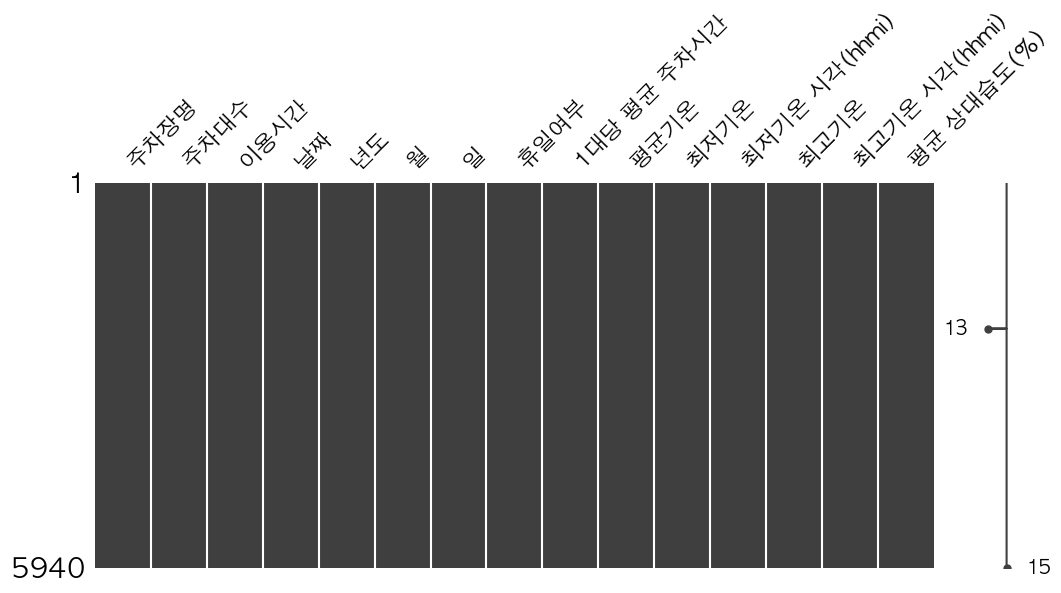

In [871]:
# 결측치 시각화
# train NaN값 시각화
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df1, figsize=(12, 5))

plt.show()

#### 결측치 없음 확인 완

In [872]:
# 주차장별 총 주차 가능 대수
total_parking_capacity = {
    '뚝섬1주차장': 67,
    '뚝섬2주차장': 356,
    '뚝섬3주차장': 112,
    '뚝섬4주차장': 136,
}

# '주차장명'을 기준으로 '총_주차가능_대수' 컬럼 추가
df1['총 주차가능 대수'] = df1['주차장명'].map(total_parking_capacity)

# 확인
df1[['주차장명', '총 주차가능 대수']].head()

,주차장명,총 주차가능 대수
0,뚝섬2주차장,356
1,뚝섬1주차장,67
2,뚝섬3주차장,112
3,뚝섬4주차장,136
4,뚝섬3주차장,112


In [873]:
df1.head()

,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi),평균 상대습도(%),총 주차가능 대수
0,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,0.3,2400.0,9.6,1539,63.6,356
1,뚝섬1주차장,175,10098.0,2024-02-29,2024,2,29,0,57.702857,4.8,0.3,2400.0,9.6,1539,63.6,67
2,뚝섬3주차장,260,20227.0,2024-02-29,2024,2,29,0,77.796154,4.8,0.3,2400.0,9.6,1539,63.6,112
3,뚝섬4주차장,526,54791.0,2024-02-29,2024,2,29,0,104.165399,4.8,0.3,2400.0,9.6,1539,63.6,136
4,뚝섬3주차장,195,17464.0,2024-02-28,2024,2,28,0,89.558974,6.4,3.2,712.0,10.1,1509,59.5,112


In [874]:
df1.columns

Index(['주차장명', '주차대수', '이용시간', '날짜', '년도', '월', '일', '휴일여부', '1대당 평균 주차시간',
       '평균기온', '최저기온', '최저기온 시각(hhmi)', '최고기온', '최고기온 시각(hhmi)', '평균 상대습도(%)',
       '총 주차가능 대수'],
      dtype='object')

In [875]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   주차장명           5940 non-null   object        
 1   주차대수           5940 non-null   int64         
 2   이용시간           5940 non-null   float64       
 3   날짜             5940 non-null   datetime64[ns]
 4   년도             5940 non-null   int64         
 5   월              5940 non-null   int64         
 6   일              5940 non-null   int64         
 7   휴일여부           5940 non-null   int64         
 8   1대당 평균 주차시간    5940 non-null   float64       
 9   평균기온           5940 non-null   float64       
 10  최저기온           5936 non-null   float64       
 11  최저기온 시각(hhmi)  5936 non-null   float64       
 12  최고기온           5940 non-null   float64       
 13  최고기온 시각(hhmi)  5940 non-null   int64         
 14  평균 상대습도(%)     5940 non-null   float64       
 15  총 주차가능 대수      5940 n

# 그래프 찍어보기

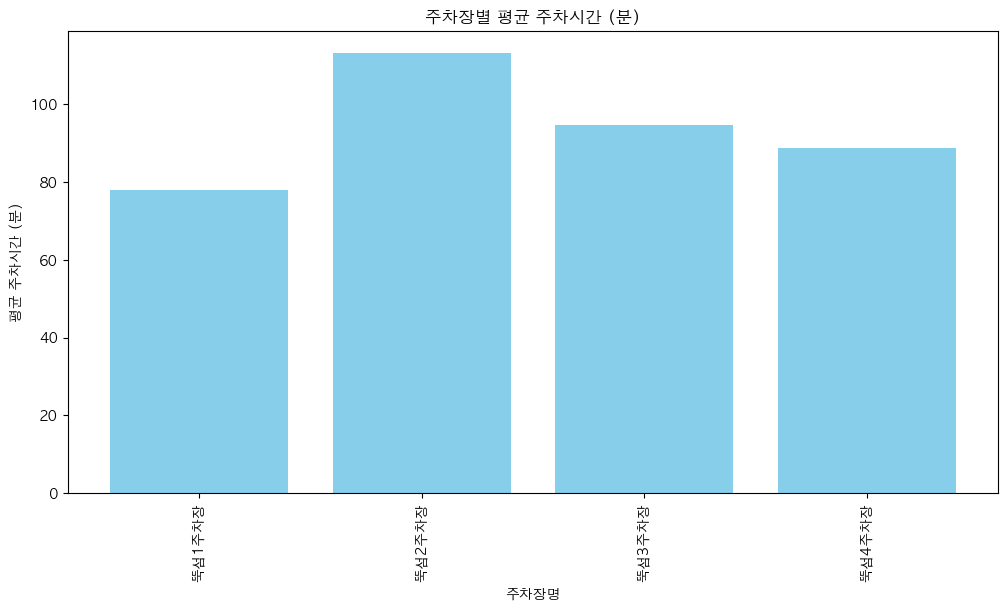

In [876]:
import matplotlib.pyplot as plt

# 주차장별 평균 주차시간을 계산
# 주차장명으로 그룹화하여 각 주차장별 총 이용시간을 주차대수로 나눠 평균을 구함
avg_parking_time = df1.groupby('주차장명').apply(lambda x: x['이용시간'].sum() / x['주차대수'].sum())
avg_parking_time = avg_parking_time.reset_index()
avg_parking_time.columns = ['주차장명', '평균_주차시간(분)']

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(avg_parking_time['주차장명'], avg_parking_time['평균_주차시간(분)'], color='skyblue')
plt.title('주차장별 평균 주차시간 (분)')
plt.xlabel('주차장명')
plt.ylabel('평균 주차시간 (분)')
plt.xticks(rotation=90)
plt.show()


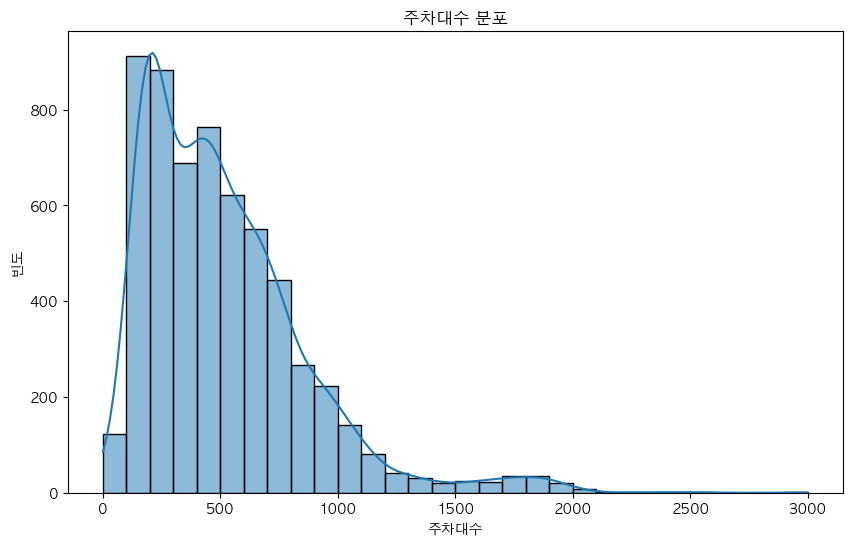

In [877]:
# 주차대수의 분포 시각화
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df1['주차대수'], bins=30, kde=True)
plt.title('주차대수 분포')
plt.xlabel('주차대수')
plt.ylabel('빈도')
plt.show()

# 주차장명별 주차대수 평균 확인
parking_lot_mean = df1.groupby('주차장명')['주차대수'].mean()

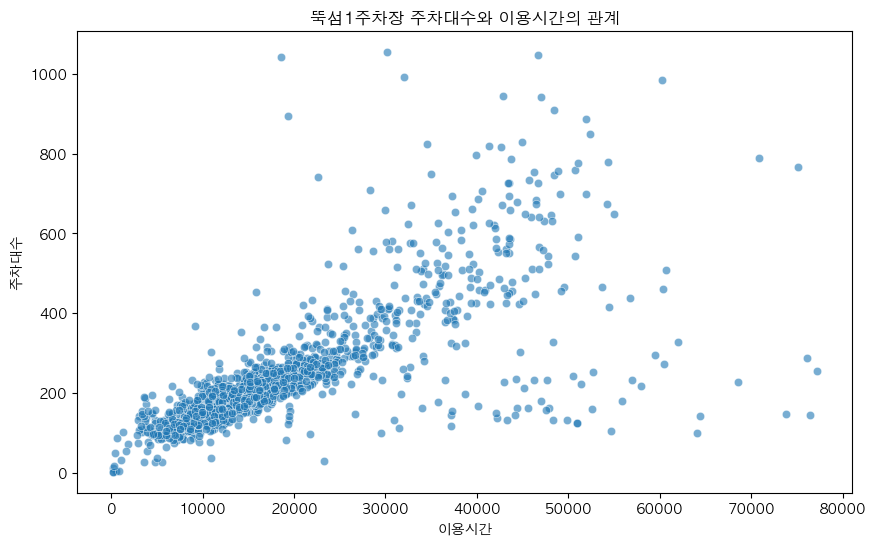

In [878]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬1 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1[df1['주차장명'] == '뚝섬1주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬1주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

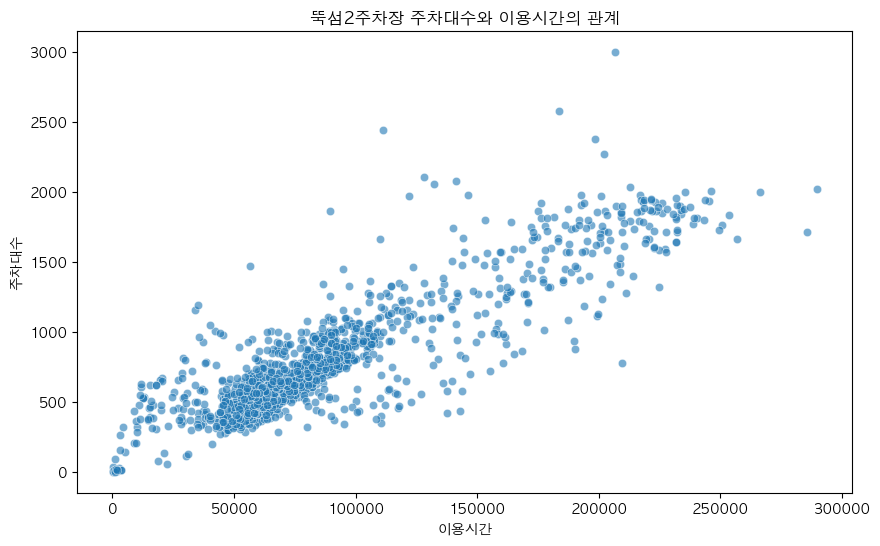

In [879]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬2 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1[df1['주차장명'] == '뚝섬2주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬2주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

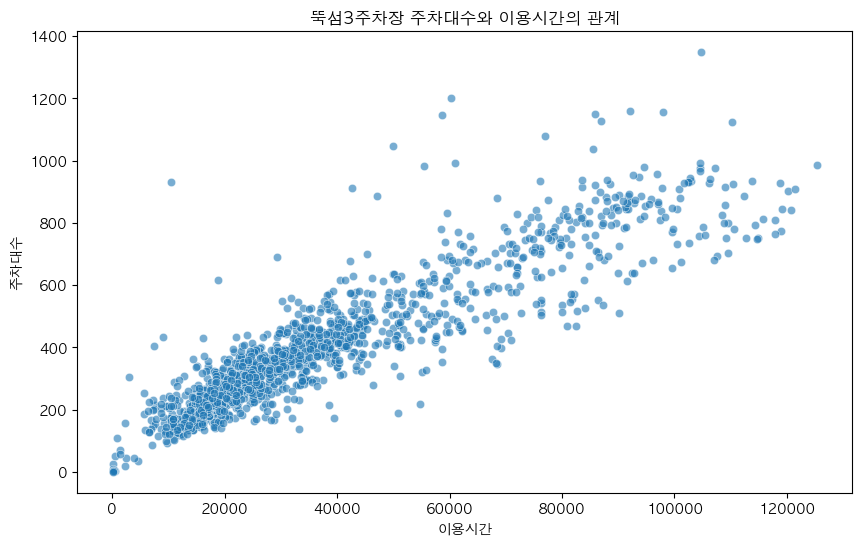

In [880]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬3 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1[df1['주차장명'] == '뚝섬3주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬3주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

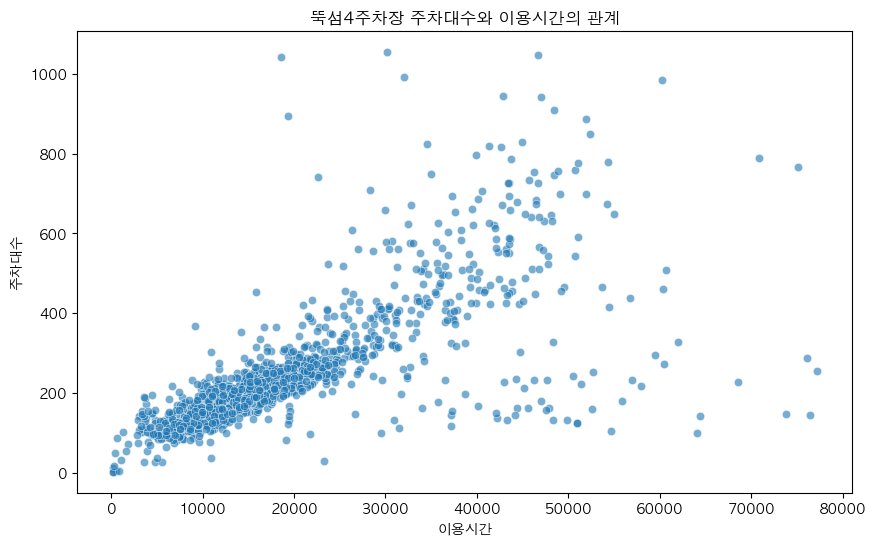

In [881]:
import matplotlib.pyplot as plt
import seaborn as sns

# 뚝섬4 주차장

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1[df1['주차장명'] == '뚝섬1주차장'], x='이용시간', y='주차대수', alpha=0.6)
plt.title('뚝섬4주차장 주차대수와 이용시간의 관계')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.show()

In [882]:
df1.이용시간

0       54850.0
1       10098.0
2       20227.0
3       54791.0
4       17464.0
         ...   
5935    30987.0
5936     1468.0
5937    14229.0
5938    18191.0
5939    19681.0
Name: 이용시간, Length: 5940, dtype: float64

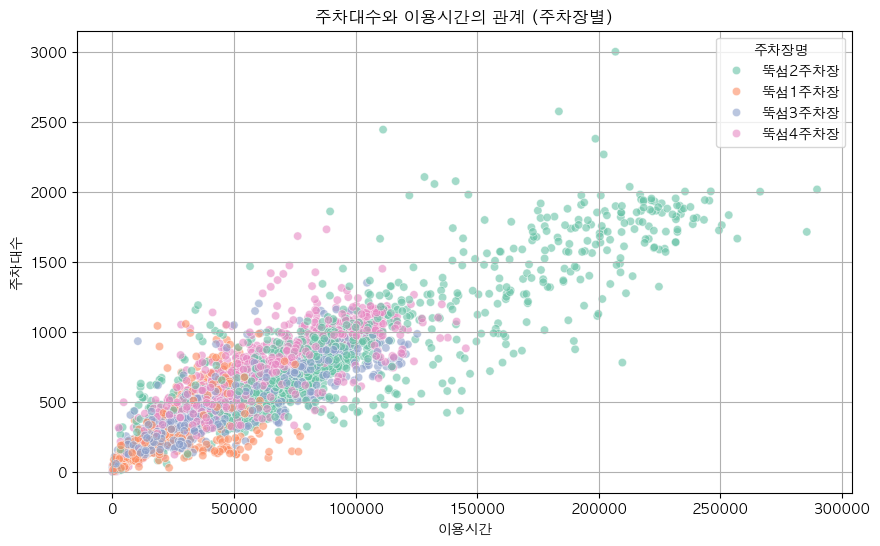

In [883]:
# 뚝섬주차장 전체보기

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# hue 옵션에 '주차장명'을 넣어 주차장별로 색상을 다르게 설정
sns.scatterplot(data=df1, x='이용시간', y='주차대수', hue='주차장명', palette='Set2', alpha=0.6)

plt.title('주차대수와 이용시간의 관계 (주차장별)')
plt.xlabel('이용시간')
plt.ylabel('주차대수')
plt.legend(title='주차장명')
plt.grid(True)
plt.show()

### 교통량에 따른 시간대에 주차장 변화가 있을 거 같아 교통량 데이터 확인작업 진행

In [884]:
df_t = pd.read_csv("../Data/뚝섬교통데이터.csv")
df_t.head()

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
0,청담대교,2024-09-30,유입,875.0,630.0,493.0,480.0,762.0,2012.0,3183.0,...,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024,9,평일
1,청담대교,2024-09-29,유입,1037.0,731.0,517.0,449.0,489.0,798.0,1252.0,...,3299.0,3085.0,3112.0,3164.0,3019.0,2152.0,1352.0,2024,9,주말
2,청담대교,2024-09-28,유입,1381.0,1059.0,763.0,687.0,852.0,1654.0,2386.0,...,2996.0,2573.0,3002.0,3049.0,3022.0,2523.0,1600.0,2024,9,주말
3,청담대교,2024-09-27,유입,1265.0,895.0,666.0,611.0,883.0,1912.0,3096.0,...,2927.0,2499.0,2981.0,3537.0,3495.0,3147.0,2060.0,2024,9,평일
4,청담대교,2024-09-26,유입,1155.0,819.0,613.0,533.0,823.0,1885.0,3106.0,...,3309.0,2780.0,3576.0,3406.0,3243.0,3417.0,2175.0,2024,9,평일


In [885]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     3470 non-null   object 
 1   일자      3470 non-null   object 
 2   방향      3470 non-null   object 
 3   0시      3470 non-null   float64
 4   1시      3470 non-null   float64
 5   2시      3470 non-null   float64
 6   3시      3470 non-null   float64
 7   4시      3470 non-null   float64
 8   5시      3470 non-null   float64
 9   6시      3470 non-null   float64
 10  7시      3470 non-null   float64
 11  8시      3470 non-null   float64
 12  9시      3470 non-null   float64
 13  10시     3470 non-null   float64
 14  11시     3470 non-null   float64
 15  12시     3470 non-null   float64
 16  13시     3470 non-null   float64
 17  14시     3470 non-null   float64
 18  15시     3470 non-null   float64
 19  16시     3470 non-null   float64
 20  17시     3470 non-null   float64
 21  18시     3470 non-null   float64
 22  

#### 모든 방향이 유입이기에 방향 컬럼 삭제

In [886]:
df_t.drop(columns=['방향'])
df_t.head()

,지점명,일자,방향,0시,1시,2시,3시,4시,5시,6시,...,17시,18시,19시,20시,21시,22시,23시,년도,월,휴일여부
0,청담대교,2024-09-30,유입,875.0,630.0,493.0,480.0,762.0,2012.0,3183.0,...,3381.0,2888.0,3249.0,3386.0,3117.0,2490.0,1821.0,2024,9,평일
1,청담대교,2024-09-29,유입,1037.0,731.0,517.0,449.0,489.0,798.0,1252.0,...,3299.0,3085.0,3112.0,3164.0,3019.0,2152.0,1352.0,2024,9,주말
2,청담대교,2024-09-28,유입,1381.0,1059.0,763.0,687.0,852.0,1654.0,2386.0,...,2996.0,2573.0,3002.0,3049.0,3022.0,2523.0,1600.0,2024,9,주말
3,청담대교,2024-09-27,유입,1265.0,895.0,666.0,611.0,883.0,1912.0,3096.0,...,2927.0,2499.0,2981.0,3537.0,3495.0,3147.0,2060.0,2024,9,평일
4,청담대교,2024-09-26,유입,1155.0,819.0,613.0,533.0,823.0,1885.0,3106.0,...,3309.0,2780.0,3576.0,3406.0,3243.0,3417.0,2175.0,2024,9,평일


In [887]:
df_t.휴일여부.unique()

array(['평일', '주말', '휴일'], dtype=object)

In [888]:
df_t.일자

0       2024-09-30
1       2024-09-29
2       2024-09-28
3       2024-09-27
4       2024-09-26
           ...    
3465    2020-01-05
3466    2020-01-04
3467    2020-01-03
3468    2020-01-02
3469    2020-01-01
Name: 일자, Length: 3470, dtype: object

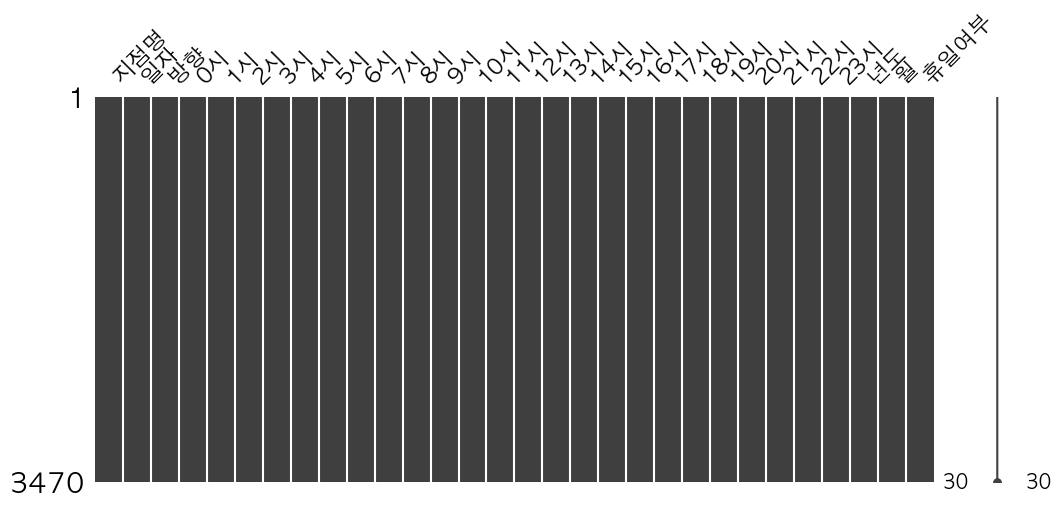

In [889]:
# 결측치 확인
import missingno as msno 

msno.matrix(df_t, figsize=(12, 5))
plt.show()

### 결측치 없음확인

### 한강데이터와 교통량 데이터 합치기

In [890]:
# df_t의 휴일여부 컬럼 변경
df_t['휴일여부'] = df_t['휴일여부'].replace({'주말': 1, '휴일': 1, '평일': 0})

# 변환 결과 확인
print(df_t['휴일여부'].unique())
print(df_t['휴일여부'].dtype)

[0 1]
int64


In [891]:
# 한강 데이터와 교통량 데이터 merge
df = pd.merge(df1, df_t, how='left')
df.head()

,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3156.0,3607.0,3657.0,3097.0,2856.0,3343.0,3657.0,3571.0,3478.0,2620.0
1,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3472.0,3564.0,3562.0,3498.0,2775.0,3093.0,3324.0,3245.0,2771.0,1728.0
2,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3372.0,3561.0,3559.0,3611.0,2949.0,3147.0,3403.0,2999.0,2546.0,1645.0
3,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3301.0,3499.0,3772.0,3379.0,2945.0,3215.0,3080.0,2404.0,2241.0,1419.0
4,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3504.0,3594.0,3301.0,3207.0,2667.0,3042.0,3438.0,3299.0,2888.0,1975.0


In [892]:
# 요일 컬럼 추가
# 날짜 컬럼을 이용
df['요일'] = df['날짜'].dt.day_name()

# 요일 순서 지정
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


## 교통량을 이용한 누적주차대수 분배

In [893]:
df['교통량 합계'] = df[
                   [
                   '6시', '7시', '8시', '9시', '10시', 
                   '11시', '12시', '13시', '14시', '15시', '16시', '17시',
                   '18시','19시', '20시', '21시', '22시', '23시', '0시'
                   ]
                   ].sum(axis=1)

df.head()

,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,평균기온,...,16시,17시,18시,19시,20시,21시,22시,23시,요일,교통량 합계
0,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3657.0,3097.0,2856.0,3343.0,3657.0,3571.0,3478.0,2620.0,Thursday,60714.0
1,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3562.0,3498.0,2775.0,3093.0,3324.0,3245.0,2771.0,1728.0,Thursday,58455.0
2,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3559.0,3611.0,2949.0,3147.0,3403.0,2999.0,2546.0,1645.0,Thursday,58182.0
3,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3772.0,3379.0,2945.0,3215.0,3080.0,2404.0,2241.0,1419.0,Thursday,56939.0
4,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,4.8,...,3301.0,3207.0,2667.0,3042.0,3438.0,3299.0,2888.0,1975.0,Thursday,57851.0


## 주차대수 분배                                            
> 시간대 비율을 활용한 주차대수를 분배                  
: 시간대별 주차대수 = 전ㅊ주차대수 * 시간대비율

In [894]:
# 아침, 낮, 저녁 시간대 열 정의
morning_columns = ['6시','7시','8시','9시','10시'] # 아침
afternoon_columns = ['11시','12시','13시','14시','15시','16시','17시'] # 낮
evening_columns = ['18시', '19시', '20시', '21시', '22시','23시','0시'] # 저녁

# 시간대별 교통량 합계 계산
df['아침 교통량 합계'] = df[morning_columns].sum(axis=1)
df['낮 교통량 합계'] = df[afternoon_columns].sum(axis=1)
df['저녁 교통량 합계'] = df[evening_columns].sum(axis=1)

# 시간대별 교통량 비율 계산
df['아침 교통량 비율'] = df['아침 교통량 합계'] / df['교통량 합계']
df['낮 교통량 비율'] = df['낮 교통량 합계'] / df['교통량 합계']
df['저녁 교통량 비율'] = df['저녁 교통량 합계'] / df['교통량 합계']

# 주차대수 분배
df['아침 주차대수'] = round(df['주차대수'] * df['아침 교통량 비율'],2)
df['낮 주차대수'] = round(df['주차대수'] * df['낮 교통량 비율'],2)
df['저녁 주차대수'] = round(df['주차대수'] * df['저녁 교통량 비율'],2)

In [895]:
df[[
                   '6시', '7시', '8시', '9시', '10시', 
                   '11시', '12시', '13시', '14시', '15시', '16시', '17시',
                   '18시','19시', '20시', '21시', '22시', '23시', '0시'
                   ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205452 entries, 0 to 205451
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   6시      205452 non-null  float64
 1   7시      205452 non-null  float64
 2   8시      205452 non-null  float64
 3   9시      205452 non-null  float64
 4   10시     205452 non-null  float64
 5   11시     205452 non-null  float64
 6   12시     205452 non-null  float64
 7   13시     205452 non-null  float64
 8   14시     205452 non-null  float64
 9   15시     205452 non-null  float64
 10  16시     205452 non-null  float64
 11  17시     205452 non-null  float64
 12  18시     205452 non-null  float64
 13  19시     205452 non-null  float64
 14  20시     205452 non-null  float64
 15  21시     205452 non-null  float64
 16  22시     205452 non-null  float64
 17  23시     205452 non-null  float64
 18  0시      205452 non-null  float64
dtypes: float64(19)
memory usage: 29.8 MB


### 이용시간(누적) => 시간대별 이용시간

In [896]:
# 전체 주차대수 합계 계산 (아침, 낮, 저녁)
df['전체 시간대 주차대수'] = df['아침 주차대수'] + df['낮 주차대수'] + df['저녁 주차대수']

# 시간대별 주차대수 비율 계산
df['아침 비율'] = df['아침 주차대수'] / df['전체 시간대 주차대수']
df['낮 비율'] = df['낮 주차대수'] / df['전체 시간대 주차대수']
df['저녁 비율'] = df['저녁 주차대수'] / df['전체 시간대 주차대수']

# 시간대별 이용시간 계산
df['아침 이용시간'] = df['이용시간'] * df['아침 비율']
df['낮 이용시간'] = df['이용시간'] * df['낮 비율']
df['저녁 이용시간'] = df['이용시간'] * df['저녁 비율']

# 결과 확인
df[['날짜', '주차장명', '이용시간', '아침 이용시간', '낮 이용시간', '저녁 이용시간']].head()

,날짜,주차장명,이용시간,아침 이용시간,낮 이용시간,저녁 이용시간
0,2024-02-29,뚝섬2주차장,54850.0,14497.130309,21692.222008,18660.647683
1,2024-02-29,뚝섬2주차장,54850.0,15086.926641,22878.167954,16884.905405
2,2024-02-29,뚝섬2주차장,54850.0,15044.571429,23114.298263,16691.130309
3,2024-02-29,뚝섬2주차장,54850.0,16051.566602,23236.069498,15562.363900
4,2024-02-29,뚝섬2주차장,54850.0,14852.141933,22625.532346,17372.325721


#### 필요없는 컬럼 삭제

In [897]:
df.drop(columns=['전체 시간대 주차대수', '아침 비율', '낮 비율','저녁 비율'], inplace=True)

In [898]:
# 제거할 컬럼
columns_to_drop = ['0시','1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시',
                   '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시',
                   '18시', '19시', '20시', '21시', '22시','23시','평균기온', '최저기온', '최저기온 시각(hhmi)', '최고기온', '최고기온 시각(hhmi)', '평균 상대습도(%)',
                   '교통량 합계', '아침 교통량 합계', '낮 교통량 합계', '저녁 교통량 합계',
                   '아침 교통량 비율', '낮 교통량 비율', '저녁 교통량 비율']

# 컬럼 제거
df.drop(columns=columns_to_drop, inplace=True)

# 결과 확인
df.head()

,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,총 주차가능 대수,지점명,일자,방향,요일,아침 주차대수,낮 주차대수,저녁 주차대수,아침 이용시간,낮 이용시간,저녁 이용시간
0,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-29,유입,Thursday,136.91,204.86,176.23,14497.130309,21692.222008,18660.647683
1,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-28,유입,Thursday,142.48,216.06,159.46,15086.926641,22878.167954,16884.905405
2,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-27,유입,Thursday,142.08,218.29,157.63,15044.571429,23114.298263,16691.130309
3,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-26,유입,Thursday,151.59,219.44,146.97,16051.566602,23236.069498,15562.363900
4,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-23,유입,Thursday,140.26,213.67,164.06,14852.141933,22625.532346,17372.325721


In [899]:
df.columns

Index(['주차장명', '주차대수', '이용시간', '날짜', '년도', '월', '일', '휴일여부', '1대당 평균 주차시간',
       '총 주차가능 대수', '지점명', '일자', '방향', '요일', '아침 주차대수', '낮 주차대수', '저녁 주차대수',
       '아침 이용시간', '낮 이용시간', '저녁 이용시간'],
      dtype='object')

In [900]:
# 저장
df.to_csv('../Data/뚝섬 주차장 시간별 주차대수.csv', index=False)

In [901]:
df = pd.read_csv("../Data/뚝섬 주차장 시간별 주차대수.csv")
df.head()

,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,총 주차가능 대수,지점명,일자,방향,요일,아침 주차대수,낮 주차대수,저녁 주차대수,아침 이용시간,낮 이용시간,저녁 이용시간
0,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-29,유입,Thursday,136.91,204.86,176.23,14497.130309,21692.222008,18660.647683
1,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-28,유입,Thursday,142.48,216.06,159.46,15086.926641,22878.167954,16884.905405
2,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-27,유입,Thursday,142.08,218.29,157.63,15044.571429,23114.298263,16691.130309
3,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-26,유입,Thursday,151.59,219.44,146.97,16051.566602,23236.069498,15562.363900
4,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,청담대교,2024-02-23,유입,Thursday,140.26,213.67,164.06,14852.141933,22625.532346,17372.325721


In [902]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205452 entries, 0 to 205451
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   주차장명         205452 non-null  object 
 1   주차대수         205452 non-null  int64  
 2   이용시간         205452 non-null  float64
 3   날짜           205452 non-null  object 
 4   년도           205452 non-null  int64  
 5   월            205452 non-null  int64  
 6   일            205452 non-null  int64  
 7   휴일여부         205452 non-null  int64  
 8   1대당 평균 주차시간  205452 non-null  float64
 9   총 주차가능 대수    205452 non-null  int64  
 10  지점명          205452 non-null  object 
 11  일자           205452 non-null  object 
 12  방향           205452 non-null  object 
 13  요일           205452 non-null  object 
 14  아침 주차대수      205452 non-null  float64
 15  낮 주차대수       205452 non-null  float64
 16  저녁 주차대수      205452 non-null  float64
 17  아침 이용시간      205452 non-null  float64
 18  낮 이용시간       205452 non-

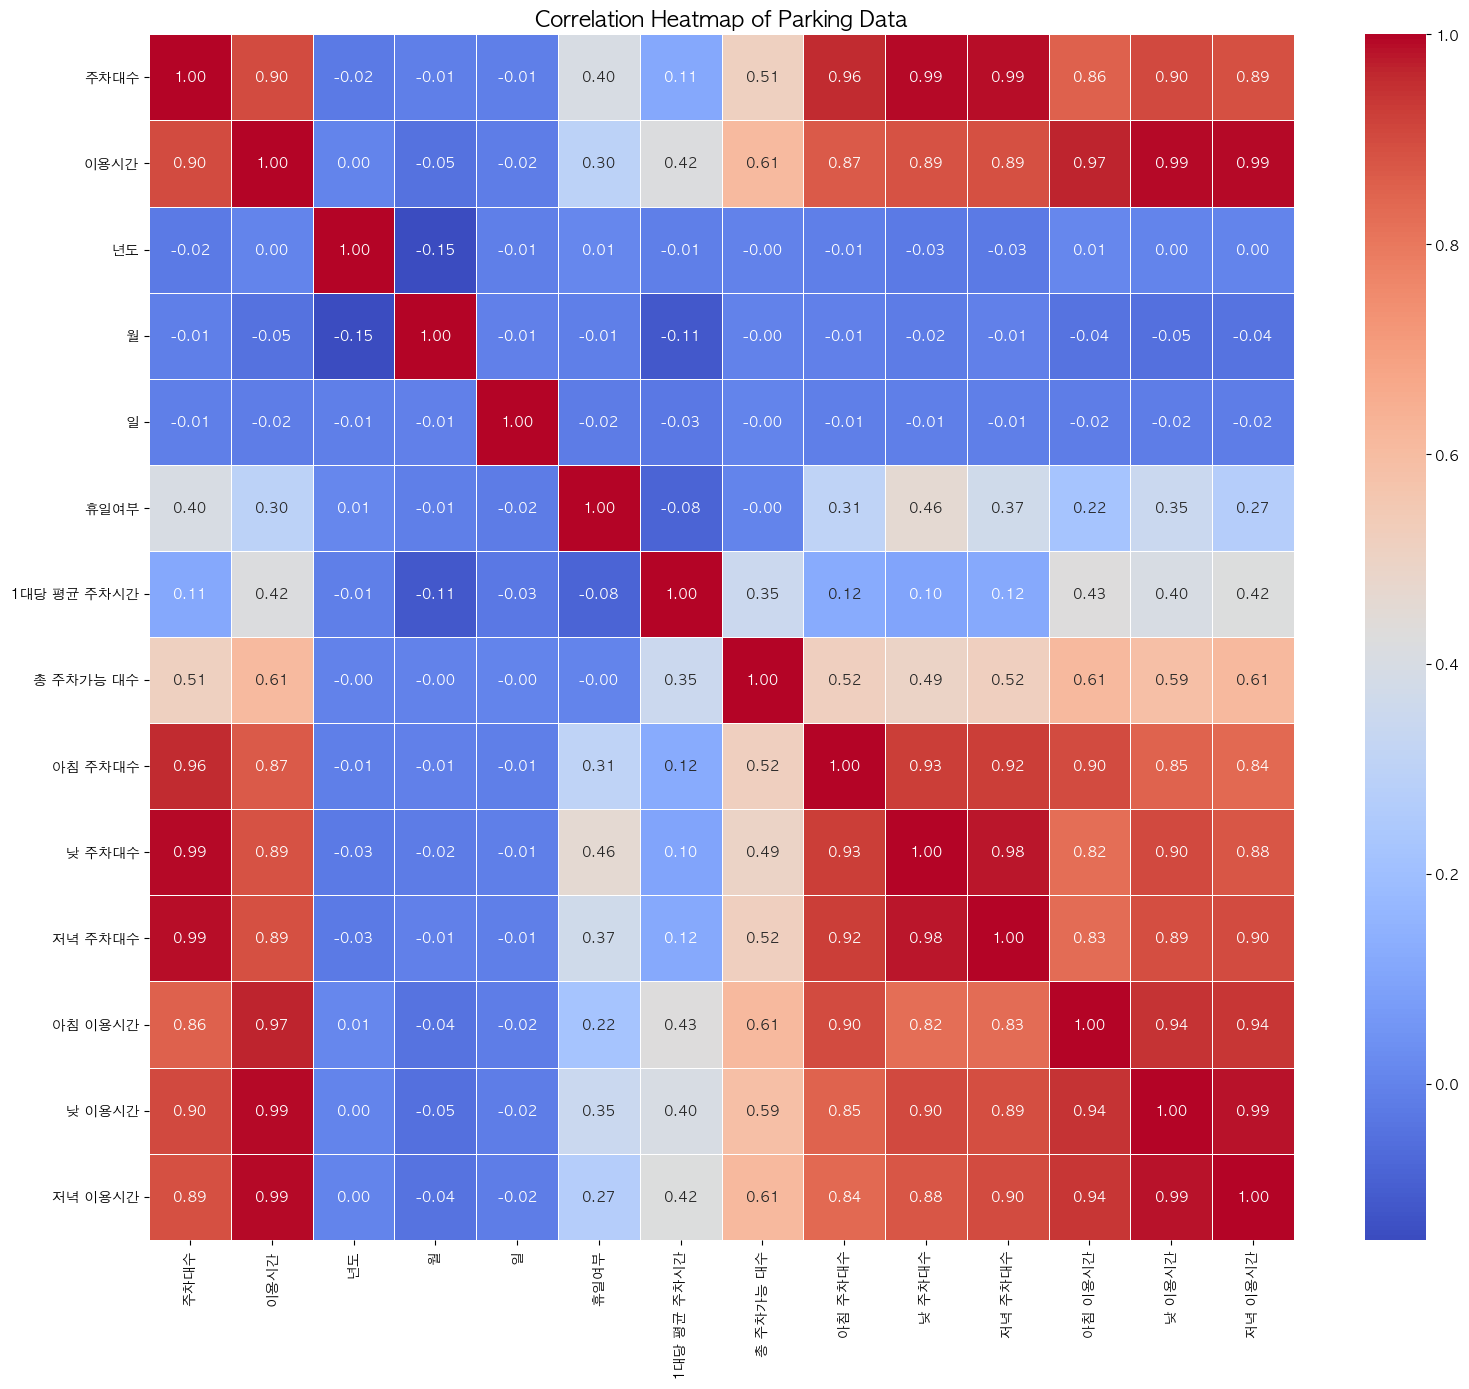


높은 상관관계를 가진 변수쌍:
이용시간       낮 이용시간       0.994710
낮 이용시간     이용시간         0.994710
주차대수       낮 주차대수       0.993157
낮 주차대수     주차대수         0.993157
이용시간       저녁 이용시간      0.992246
                          ...   
아침 주차대수    총 주차가능 대수    0.518957
총 주차가능 대수  저녁 주차대수      0.515452
저녁 주차대수    총 주차가능 대수    0.515452
총 주차가능 대수  주차대수         0.514379
주차대수       총 주차가능 대수    0.514379
Length: 70, dtype: float64


In [903]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜 열을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
df['일자'] = pd.to_datetime(df['일자'])

# 수치형 데이터만 선택
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Parking Data', fontsize=16)
plt.tight_layout()
plt.show()

# 상관계수가 높은 변수쌍 출력 (절대값 0.5 이상)
high_correlation = correlation_matrix.unstack()
high_correlation = high_correlation[abs(high_correlation) > 0.5]
high_correlation = high_correlation[high_correlation < 1.0]  # 자기 자신과의 상관관계 제외
print("\n높은 상관관계를 가진 변수쌍:")
print(high_correlation.sort_values(ascending=False))

### 상관관계가 0.3 이상인것만 표시

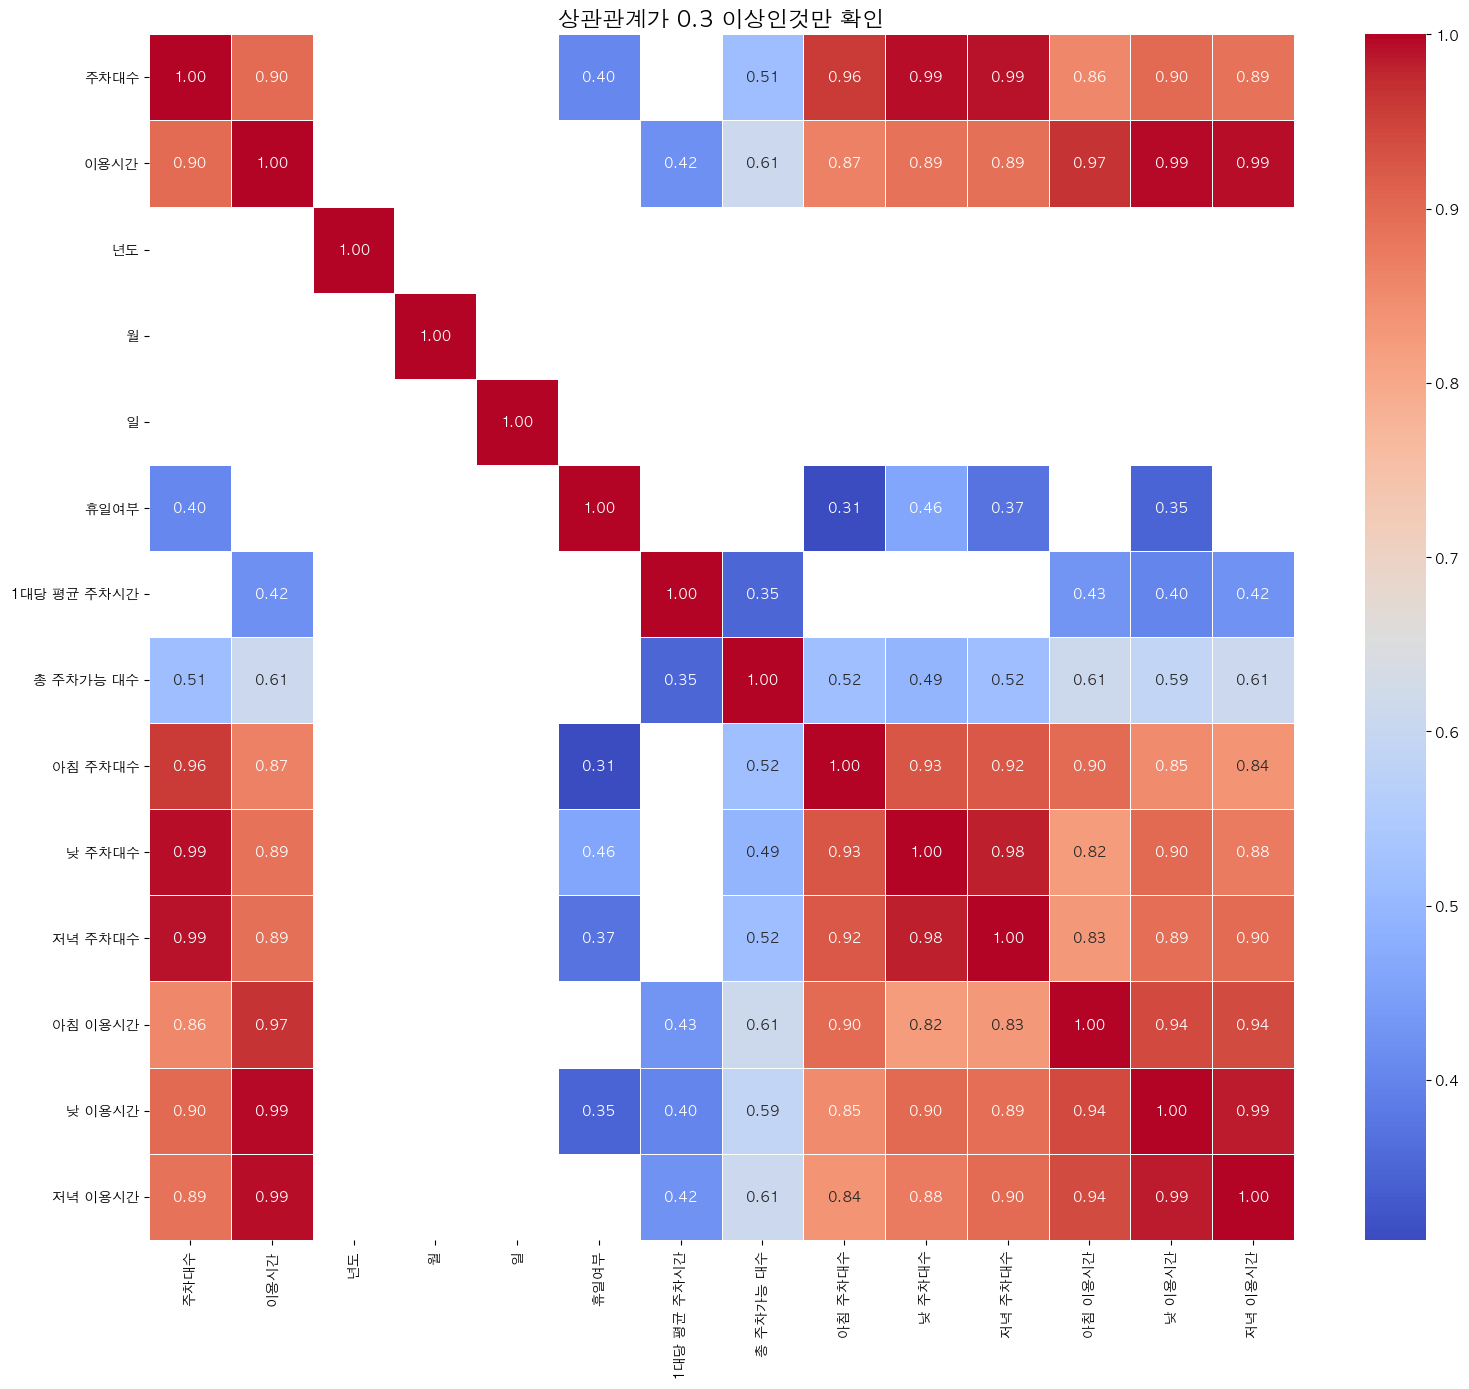


상관계수가 0.3 이상인 변수쌍:
이용시간         낮 이용시간       0.994710
낮 이용시간       이용시간         0.994710
낮 주차대수       주차대수         0.993157
주차대수         낮 주차대수       0.993157
저녁 이용시간      이용시간         0.992246
                            ...   
1대당 평균 주차시간  총 주차가능 대수    0.349987
낮 이용시간       휴일여부         0.348358
휴일여부         낮 이용시간       0.348358
             아침 주차대수      0.308170
아침 주차대수      휴일여부         0.308170
Length: 92, dtype: float64


In [904]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜 열을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
df['일자'] = pd.to_datetime(df['일자'])

# 수치형 데이터만 선택
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# 히트맵 그리기 (상관계수 0.3 이상만 표시)
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', 
            mask=(abs(correlation_matrix) < 0.3))
plt.title('상관관계가 0.3 이상인것만 확인', fontsize=16)
plt.tight_layout()
plt.show()

# 상관계수가 0.3 이상인 변수쌍 출력
high_correlation = correlation_matrix.unstack()
high_correlation = high_correlation[(abs(high_correlation) >= 0.3) & (high_correlation < 1.0)]
print("\n상관계수가 0.3 이상인 변수쌍:")
print(high_correlation.sort_values(ascending=False))

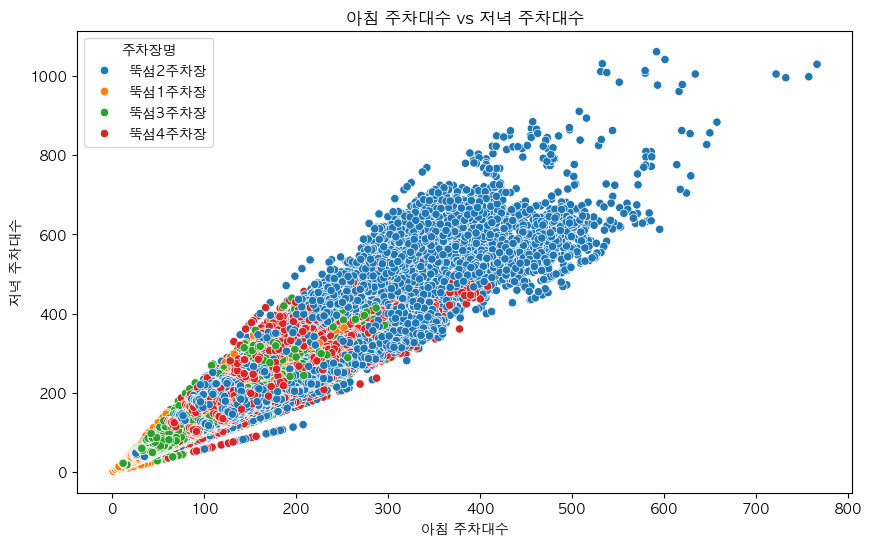

In [905]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='아침 주차대수', y='저녁 주차대수', hue='주차장명')
plt.title('아침 주차대수 vs 저녁 주차대수')
plt.show()

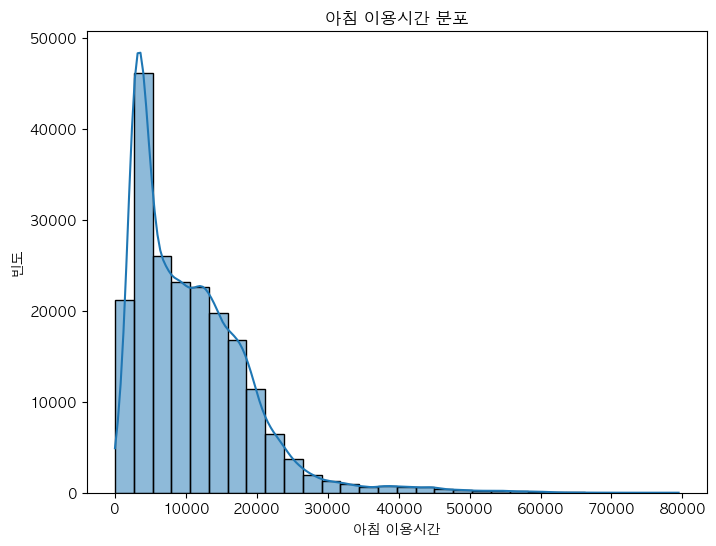

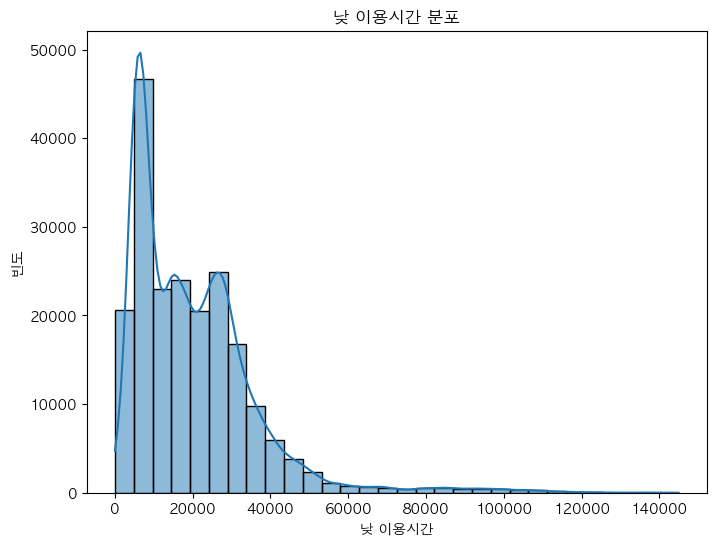

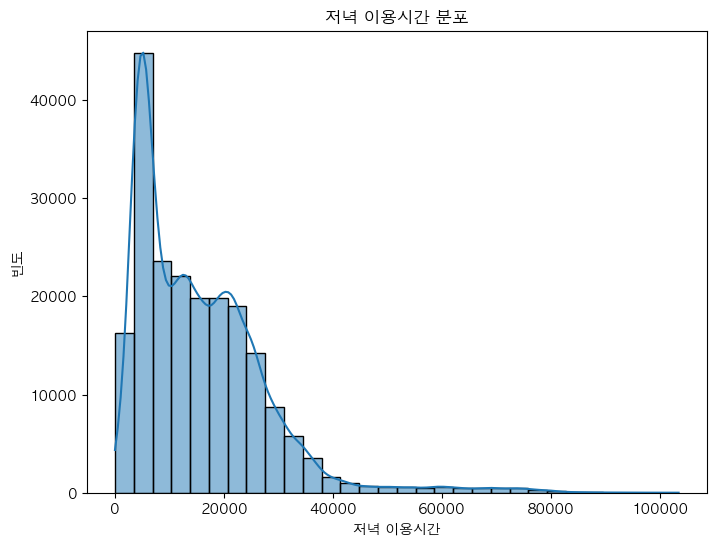

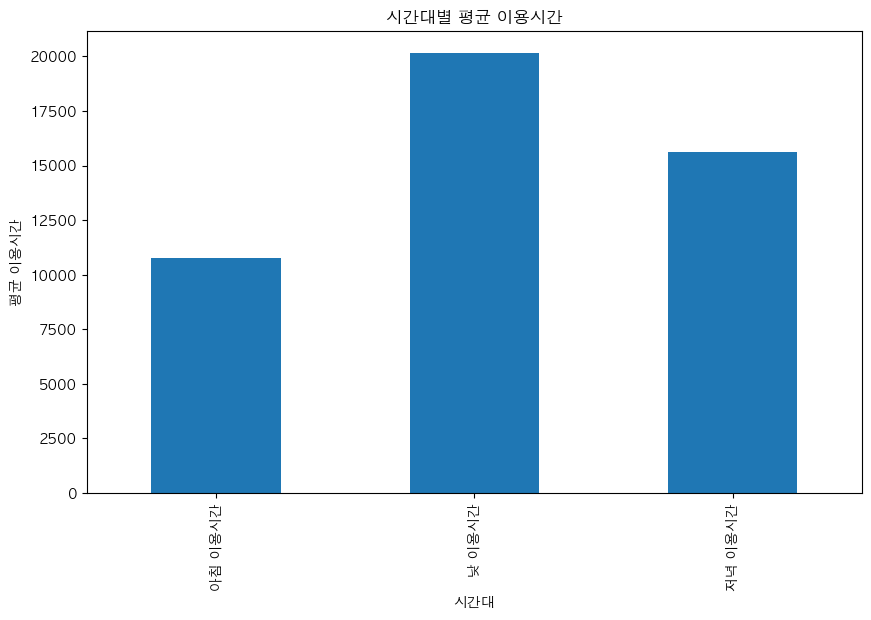

In [906]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시간대별 이용시간 평균
time_usage_means = df[['아침 이용시간', '낮 이용시간', '저녁 이용시간']].mean()

# 히스토그램: 시간대별 이용시간 분포
for col in ['아침 이용시간', '낮 이용시간', '저녁 이용시간']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.show()

# 시간대별 평균 이용시간 시각화
plt.figure(figsize=(10, 6))
time_usage_means.plot(kind='bar')
plt.title('시간대별 평균 이용시간')
plt.xlabel('시간대')
plt.ylabel('평균 이용시간')
plt.show()


### 주차장별 평균 주차대수

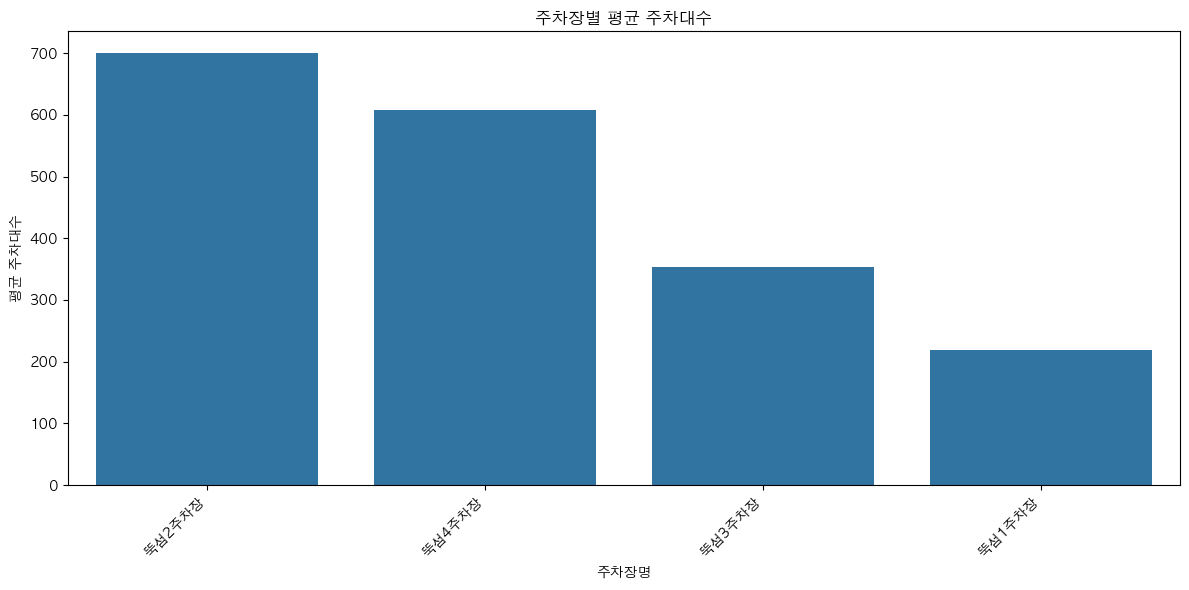

In [907]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
avg_parking_by_location = df.groupby('주차장명')['주차대수'].mean().sort_values(ascending=False)
sns.barplot(x=avg_parking_by_location.index, y=avg_parking_by_location.values)
plt.title('주차장별 평균 주차대수')
plt.xlabel('주차장명')
plt.ylabel('평균 주차대수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 시간대별 평균 주차대수

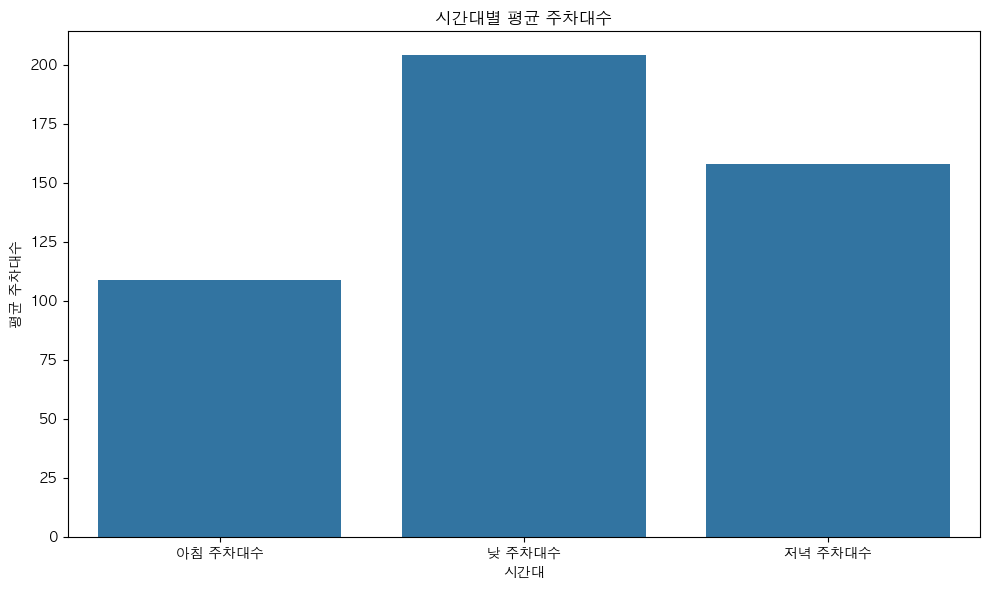

In [908]:
plt.figure(figsize=(10, 6))
time_periods = ['아침 주차대수', '낮 주차대수', '저녁 주차대수']
avg_parking_by_time = df[time_periods].mean()
sns.barplot(x=time_periods, y=avg_parking_by_time)
plt.title('시간대별 평균 주차대수')
plt.xlabel('시간대')
plt.ylabel('평균 주차대수')
plt.tight_layout()
plt.show()

### 월별 평균 주차대수

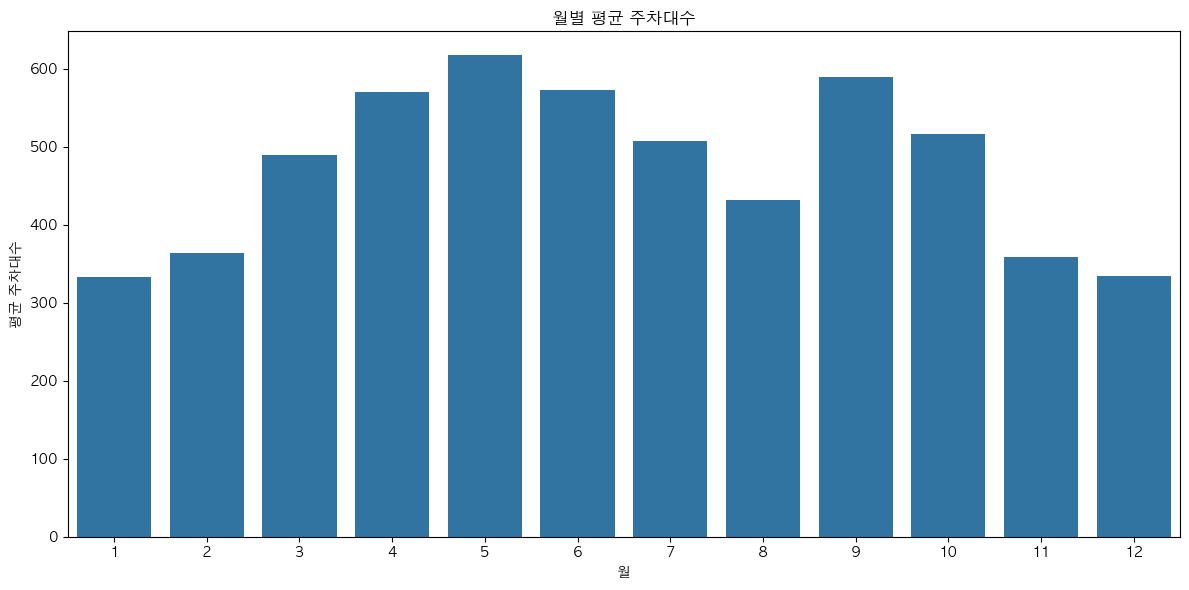

In [909]:
plt.figure(figsize=(12, 6))
avg_parking_by_month = df.groupby('월')['주차대수'].mean()
sns.barplot(x=avg_parking_by_month.index, y=avg_parking_by_month.values)
plt.title('월별 평균 주차대수')
plt.xlabel('월')
plt.ylabel('평균 주차대수')
plt.tight_layout()
plt.show()

### 휴일 / 평일 주차 비교

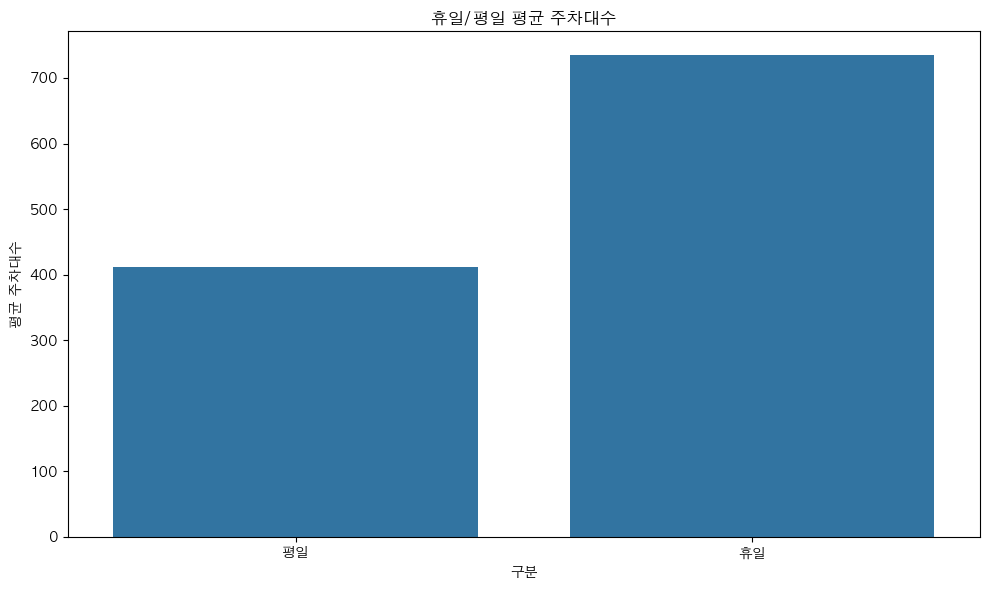

In [910]:
plt.figure(figsize=(10, 6))
avg_parking_by_holiday = df.groupby('휴일여부')['주차대수'].mean()
sns.barplot(x=['평일', '휴일'], y=avg_parking_by_holiday)
plt.title('휴일/평일 평균 주차대수')
plt.xlabel('구분')
plt.ylabel('평균 주차대수')
plt.tight_layout()
plt.show()

> 휴일의 평균 주차대수가 더 많다

#### 요일별 이용시간 그래프로 확인

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205452 entries, 0 to 205451
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   주차장명         205452 non-null  object        
 1   주차대수         205452 non-null  int64         
 2   이용시간         205452 non-null  float64       
 3   날짜           205452 non-null  datetime64[ns]
 4   년도           205452 non-null  int64         
 5   월            205452 non-null  int64         
 6   일            205452 non-null  int64         
 7   휴일여부         205452 non-null  int64         
 8   1대당 평균 주차시간  205452 non-null  float64       
 9   총 주차가능 대수    205452 non-null  int64         
 10  지점명          205452 non-null  object        
 11  일자           205452 non-null  datetime64[ns]
 12  방향           205452 non-null  object        
 13  요일           205452 non-null  object        
 14  아침 주차대수      205452 non-null  float64       
 15  낮 주차대수       205452 non-null  floa

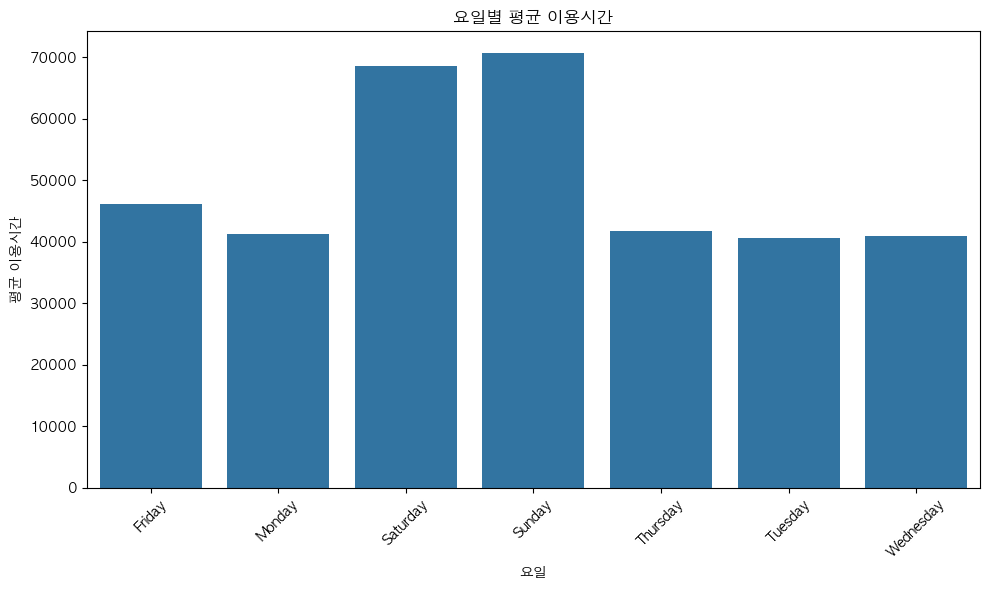

In [912]:
import matplotlib.pyplot as plt
import seaborn as sns

# 요일별 평균 이용시간 계산
avg_usage_by_day = df.groupby('요일')['이용시간'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_usage_by_day.index, y=avg_usage_by_day.values)
plt.title('요일별 평균 이용시간')
plt.xlabel('요일')
plt.ylabel('평균 이용시간')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

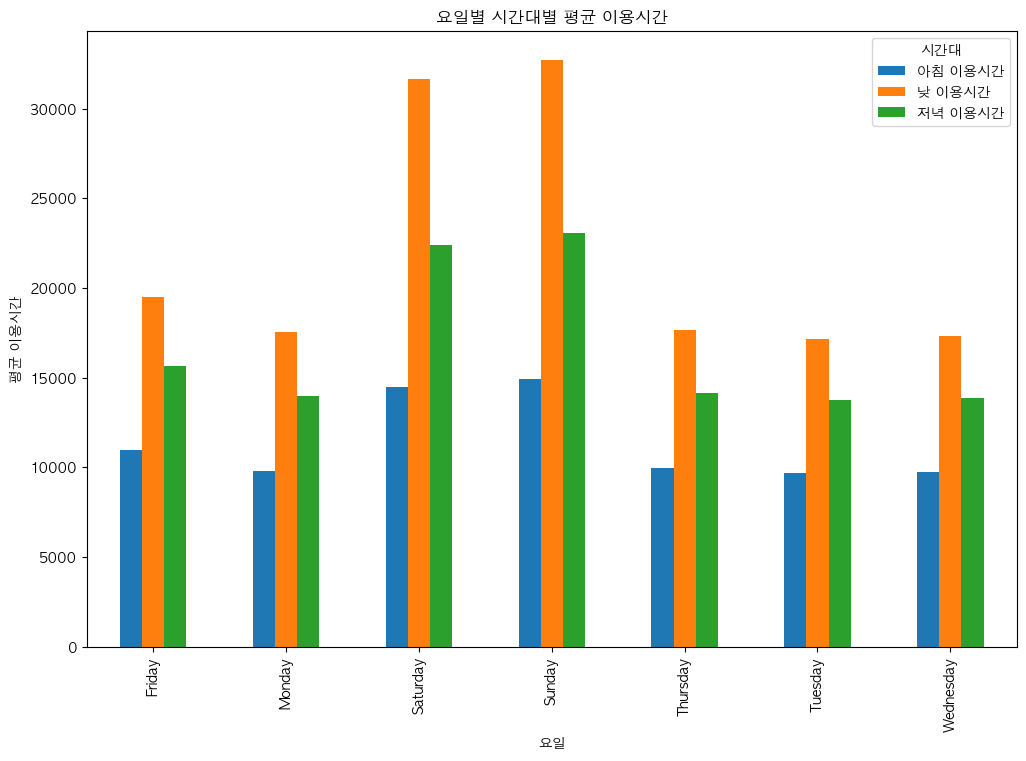

In [913]:
# 요일별 시간대별 평균 이용시간 계산
weekday_usage = df.groupby('요일')[['아침 이용시간', '낮 이용시간', '저녁 이용시간']].mean()

# 요일별 시간대별 평균 이용시간 시각화
weekday_usage.plot(kind='bar', figsize=(12, 8))
plt.title('요일별 시간대별 평균 이용시간')
plt.ylabel('평균 이용시간')
plt.legend(title='시간대')
plt.show()


시간대별 평균 이용시간
- 아침 이용시간이 상대적으로 낮음.
- 뚝섬은 평일보다는 주말에 주차장이 더 많이 혼잡할 것으로 보임.          

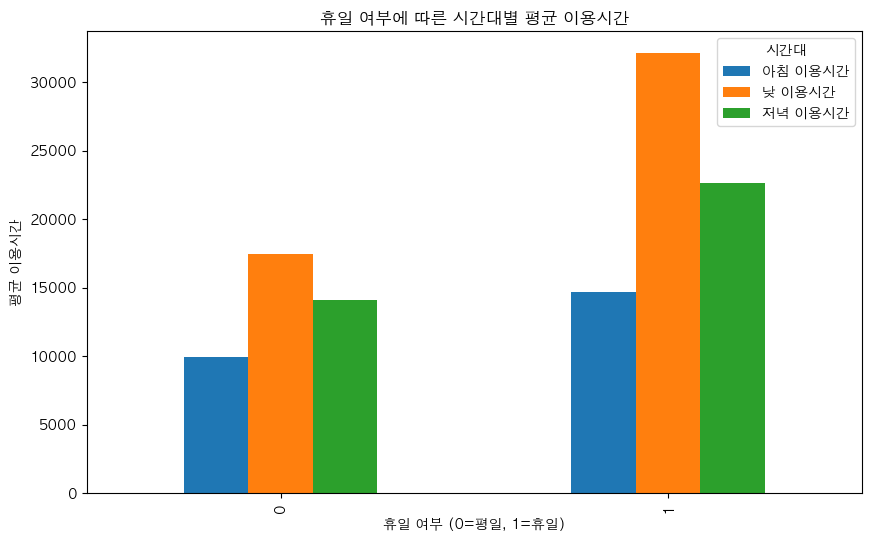

In [914]:
# 휴일 여부별 시간대별 평균 이용시간 계산
holiday_usage = df.groupby('휴일여부')[['아침 이용시간', '낮 이용시간', '저녁 이용시간']].mean()

# 시각화
holiday_usage.plot(kind='bar', figsize=(10, 6))
plt.title('휴일 여부에 따른 시간대별 평균 이용시간')
plt.xlabel('휴일 여부 (0=평일, 1=휴일)')
plt.ylabel('평균 이용시간')
plt.legend(title='시간대')
plt.show()


### 요일별과 휴일여부에 따른 그래프를 확인해본 결과 뚝섬주차장은 휴일의 이용객이 더 많다 라는걸 알 수 있음                                                          

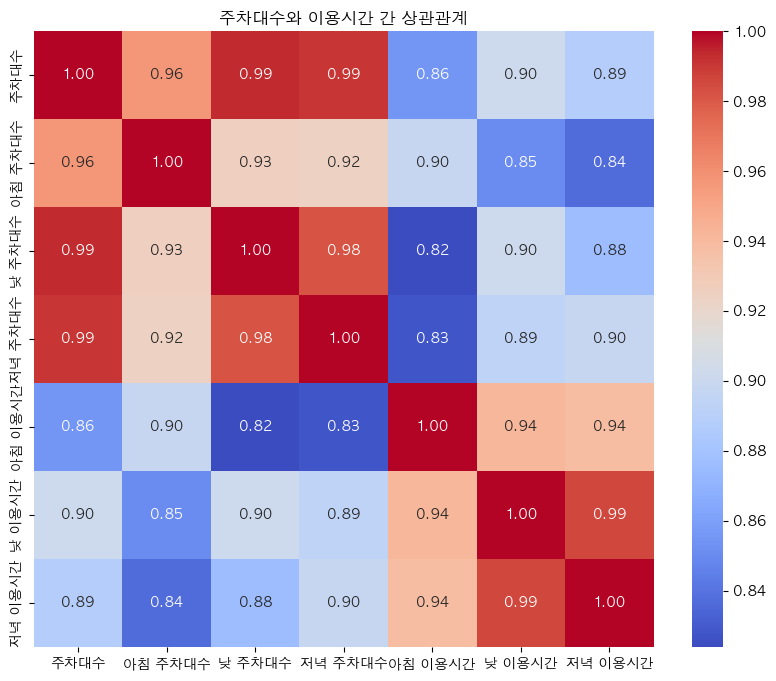

In [915]:
# 상관관계 계산
corr_matrix = df[['주차대수', '아침 주차대수', '낮 주차대수', '저녁 주차대수', '아침 이용시간', '낮 이용시간', '저녁 이용시간']].corr()

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('주차대수와 이용시간 간 상관관계')
plt.show()


In [920]:
df.to_csv("../Data/뚝섬주차장.csv", index=False)

In [921]:
df = pd.read_csv("../Data/뚝섬주차장.csv")
df.head()

,주차장명,주차대수,이용시간,날짜,년도,월,일,휴일여부,1대당 평균 주차시간,총 주차가능 대수,...,아침 주차대수,낮 주차대수,저녁 주차대수,아침 이용시간,낮 이용시간,저녁 이용시간,예측 이용시간,아침 혼잡도,낮 혼잡도,저녁 혼잡도
0,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,...,136.91,204.86,176.23,14497.130309,21692.222008,18660.647683,54850.0,여유,보통,여유
1,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,...,142.48,216.06,159.46,15086.926641,22878.167954,16884.905405,54850.0,여유,보통,여유
2,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,...,142.08,218.29,157.63,15044.571429,23114.298263,16691.130309,54850.0,여유,보통,여유
3,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,...,151.59,219.44,146.97,16051.566602,23236.069498,15562.363900,54850.0,여유,보통,여유
4,뚝섬2주차장,518,54850.0,2024-02-29,2024,2,29,0,105.888031,356,...,140.26,213.67,164.06,14852.141933,22625.532346,17372.325721,54850.0,여유,보통,여유


---

## 모델링 목표
    타겟 변수:
    시간대별 주차 대수: 아침 주차대수, 낮 주차대수, 저녁 주차대수.

    입력 피처:
    요일, 휴일여부, 주차장명, 지구별, 연도, 월, 일.

    결과 출력:
    예측된 시간대별 주차 대수 기반으로 혼잡도(여유, 보통, 혼잡, 만차)를 제공

### 혼잡도 계산 기준
    여유: 예측 주차대수 ≤ 50% * 주차구획수
    보통: 50% < 예측 주차대수 ≤ 80% * 주차구획수
    혼잡: 80% < 예측 주차대수 ≤ 100% * 주차구획수
    만차: 예측 주차대수 > 100% * 주차구획수

### 데이터 준비

In [916]:
# 입력 피처 및 타겟 변수 설정
features = ['요일', '휴일여부', '주차장명', '년도', '월', '일']
target_usage = '이용시간'
targets_parking = ['아침 주차대수', '낮 주차대수', '저녁 주차대수']

# 범주형 데이터 처리
X = pd.get_dummies(df[features])
y_usage = df[target_usage]
y_parking = df[targets_parking]


### 이용시간 예측

In [917]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_usage, test_size=0.2, random_state=42)

# 모델 학습
usage_model = RandomForestRegressor(random_state=42)
usage_model.fit(X_train, y_train)

# 예측
predicted_usage = usage_model.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_usage = usage_model.score(X_train, y_train)
test_score_usage = usage_model.score(X_test, y_test)

print(f"이용시간 예측 모델 - 훈련 점수: {train_score_usage:.2f}")
print(f"이용시간 예측 모델 - 테스트 점수: {test_score_usage:.2f}")

이용시간 예측 모델 - 훈련 점수: 1.00
이용시간 예측 모델 - 테스트 점수: 1.00


### 시간대별 주차대수 예측

In [918]:
from sklearn.multioutput import MultiOutputRegressor

# 예측된 이용시간 추가
df['예측 이용시간'] = usage_model.predict(X)

# 새로운 입력 피처 설정
features_with_usage = ['예측 이용시간'] + features
X_parking = pd.get_dummies(df[features_with_usage])

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_parking, y_parking, test_size=0.2, random_state=42)

# MultiOutputRegressor로 학습
parking_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
parking_model.fit(X_train, y_train)

# 예측
predicted_parking = parking_model.predict(X_test)

# 훈련 및 테스트 점수 출력
train_score_parking = parking_model.score(X_train, y_train)
test_score_parking = parking_model.score(X_test, y_test)

print(f"시간대별 주차대수 예측 모델 - 훈련 점수: {train_score_parking:.2f}")
print(f"시간대별 주차대수 예측 모델 - 테스트 점수: {test_score_parking:.2f}")


시간대별 주차대수 예측 모델 - 훈련 점수: 0.97
시간대별 주차대수 예측 모델 - 테스트 점수: 0.97


### 혼잡도 계산

In [919]:
# 혼잡도 계산 함수
def calculate_congestion(parking_count, capacity):
    ratio = parking_count / capacity
    if ratio <= 0.5:
        return '여유'
    elif ratio <= 0.8:
        return '보통'
    elif ratio <= 1.0:
        return '혼잡'
    else:
        return '만차'

# 예측
predicted_parking_full = parking_model.predict(X_parking)

# 혼잡도 계산
for time, idx in zip(['아침', '낮', '저녁'], range(3)):
    df[f'{time} 혼잡도'] = [
        calculate_congestion(p, c) 
        for p, c in zip(predicted_parking_full[:, idx], df['총 주차가능 대수'])
    ]

# 결과 확인
result = df[['날짜', '주차장명', '예측 이용시간', '아침 혼잡도', '낮 혼잡도', '저녁 혼잡도']]
print(result.head())

          날짜    주차장명  예측 이용시간 아침 혼잡도 낮 혼잡도 저녁 혼잡도
0 2024-02-29  뚝섬2주차장  54850.0     여유    보통     여유
1 2024-02-29  뚝섬2주차장  54850.0     여유    보통     여유
2 2024-02-29  뚝섬2주차장  54850.0     여유    보통     여유
3 2024-02-29  뚝섬2주차장  54850.0     여유    보통     여유
4 2024-02-29  뚝섬2주차장  54850.0     여유    보통     여유
